## Importing Libraries

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## Data Loading

In [19]:
# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
           'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, delim_whitespace=True, names=columns)


<ipython-input-19-043e24addf58>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)


## Data Exploration

In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [21]:
# Step 2: Inspect the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [22]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [23]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [24]:
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [25]:
# Handle missing values in 'horsepower'
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # Convert '?' to NaN
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

<ipython-input-25-f860356959fd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


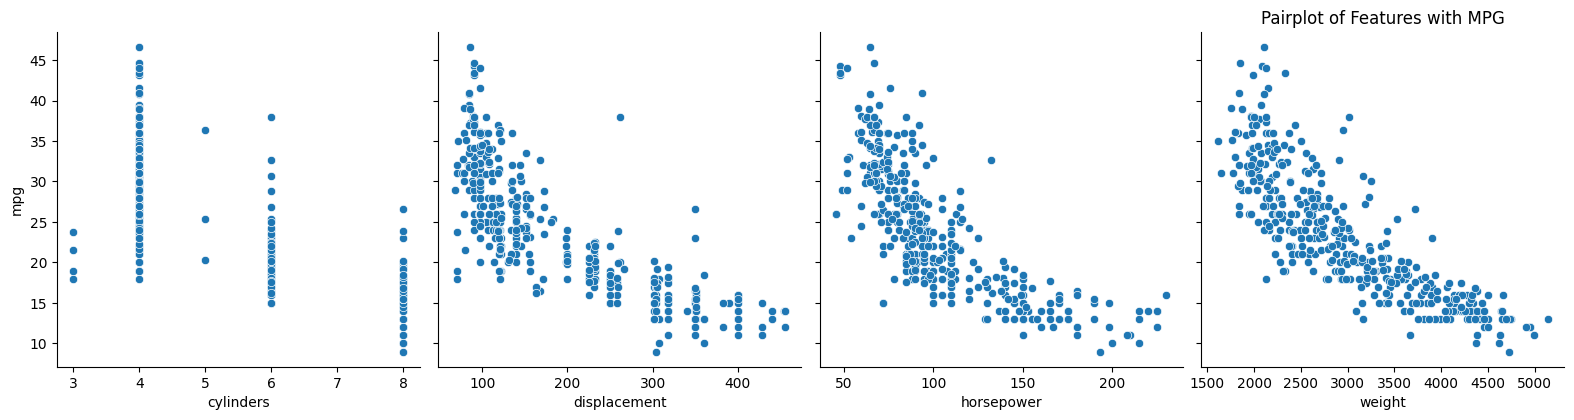

In [26]:
# Step 3: EDA
sns.pairplot(df, x_vars=['cylinders', 'displacement', 'horsepower', 'weight'], y_vars='mpg', height=4)
plt.title("Pairplot of Features with MPG")
plt.show()

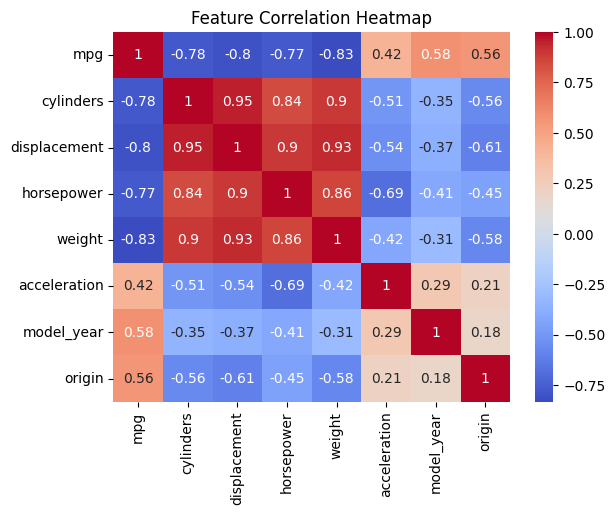

In [27]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# **Preprocessing**

In [28]:
# Step 4: Preprocessing
# Drop 'car_name'
df.drop(columns=['car_name'], inplace=True)

# Define target and features
X = df.drop(columns=['mpg'])
y = df['mpg']

# Column transformer for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['displacement', 'horsepower', 'weight', 'acceleration']),
        ('cat', OneHotEncoder(), ['origin'])
    ])

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

In [32]:
# Step 1: Create a DataFrame to Store Results
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'RMSE': [],
    'MAE': []
}

# Collect RMSE and MAE from the trained models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)

# Add the tuned Random Forest results
results['Model'].append('Tuned Random Forest')
results['RMSE'].append(rmse)  # From grid search
results['MAE'].append(mae)  # From grid search

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

In [34]:
results_df

,Model,RMSE,MAE
0,Linear Regression,3.747459,3.047040
1,Decision Tree,4.558591,3.187500
2,Random Forest,3.431763,2.591956
3,Tuned Random Forest,3.431763,2.591956


<ipython-input-33-b6d0052ad741>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='RMSE', palette='viridis')
<ipython-input-33-b6d0052ad741>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='MAE', palette='viridis')


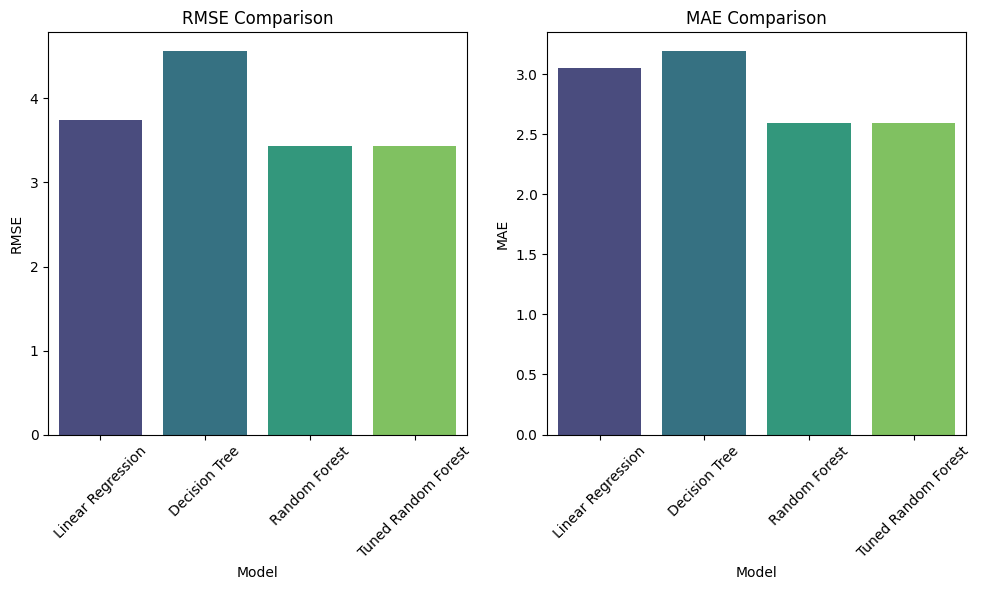

In [33]:

# Bar Plot for RMSE and MAE
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=results_df, x='Model', y='RMSE', palette='viridis')
plt.title('RMSE Comparison')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=results_df, x='Model', y='MAE', palette='viridis')
plt.title('MAE Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

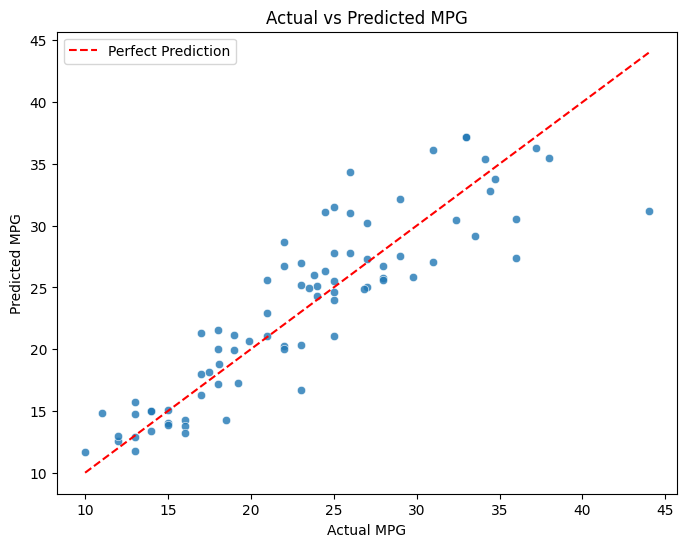

In [35]:
# Scatter Plot: Actual vs Predicted for the Best Model (Tuned Random Forest)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.legend()
plt.show()


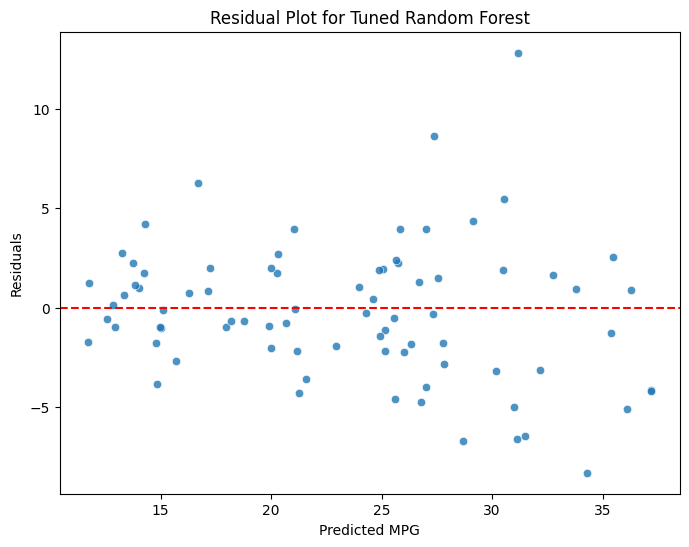

In [36]:
# Residual Plot for the Best Model
residuals = y_test - y_pred_best

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.title('Residual Plot for Tuned Random Forest')
plt.show()

# **Hyperparameter Tuning for Random Forest**

In [30]:
# Step 7: Hyperparameter Tuning for Random Forest
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))]),
    param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

# Best parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the tuned model
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Tuned Random Forest:\n\tRMSE: {rmse:.2f}\n\tMAE: {mae:.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'model__max_depth': 20, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Tuned Random Forest:
	RMSE: 3.43
	MAE: 2.61


# **Feature Importance**

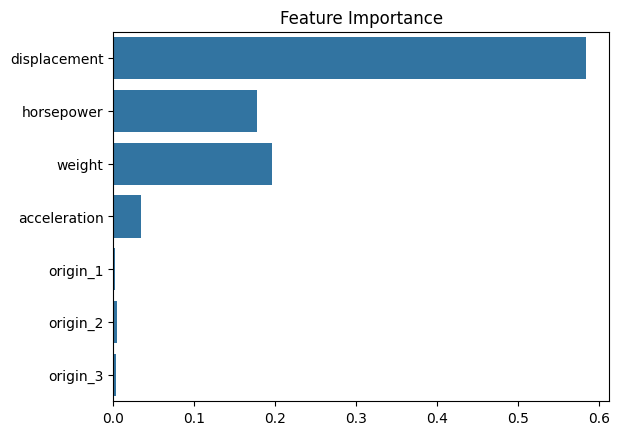

In [31]:
# Step 8: Feature Importance
final_rf = grid_search.best_estimator_.named_steps['model']
feature_importance = final_rf.feature_importances_
feature_names = preprocessor.transformers_[0][2] + list(
    grid_search.best_estimator_.named_steps['preprocessor']
    .transformers_[1][1]
    .get_feature_names_out()
)
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance")
plt.show()